In [1]:
# 导入必要的库

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 设置中文字体

In [4]:
from matplotlib import font_manager

In [5]:
my_font = font_manager.FontProperties(fname = 'C:\Windows\Fonts\msyh.ttc')

In [6]:
# 读取数据

In [7]:
path = 'D:\python\Data Analysis\CDNOW.txt'
df = pd.read_table(path, sep = '\s+',names = ['user_id','time','quantity','price'])

D:\Software\Python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [8]:
# 查看数据

In [9]:
df.info()     # 无缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id     69659 non-null int64
time        69659 non-null int64
quantity    69659 non-null int64
price       69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [10]:
# 数据预处理

In [11]:
df['time']= pd.to_datetime(df['time'],format='%Y%m%d')

In [12]:
df.head(10)

,user_id,time,quantity,price
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
5,3,1997-04-02,2,19.54
6,3,1997-11-15,5,57.45
7,3,1997-11-25,4,20.96
8,3,1998-05-28,1,16.99
9,4,1997-01-01,2,29.33


In [74]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id     69659 non-null int64
time        69659 non-null datetime64[ns]
quantity    69659 non-null int64
price       69659 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


# **<font color = orange> 1. 商品销售静态分析</font>**

## 1.1 各订单 购买数量分析

#### -- 描述性统计分析

In [41]:
df.describe()

,user_id,time,quantity,price
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


####  **<font color = blue> 结论：</font>**
1 平均每笔订单购买2.4个商品，标准差为2.33，稍稍有波动性；
2 中位数为2个商品，75分位数为3个商品，说明绝大部分订单的购买数量都不多。单个   订单最大购买量为99个，数字较高。一般而言，消费类的数据分布，都是长尾形态。大部分用户都是小额，然而小部分用户贡献了收入的大头，俗称二八。
3 一般而言，消费类的数据分布，都是长尾形态。大部分用户都是小额，然而小部分用户贡献了收入的大头，俗称二八。
4 

#### -- 各订单 购买数量分布

In [128]:
data1 =df.groupby('quantity').count() # 提取数据

In [129]:
data1.head(10)

,user_id,time,price
quantity,,,
1,31454,31454,31454
2,16070,16070,16070
3,9444,9444,9444
4,5015,5015,5015
5,2792,2792,2792
6,1627,1627,1627
7,1057,1057,1057
8,684,684,684
9,403,403,403


In [130]:
data1.tail()

,user_id,time,price
quantity,,,
47,1,1,1
56,2,2,2
63,1,1,1
70,1,1,1
99,1,1,1


<BarContainer object of 45 artists>

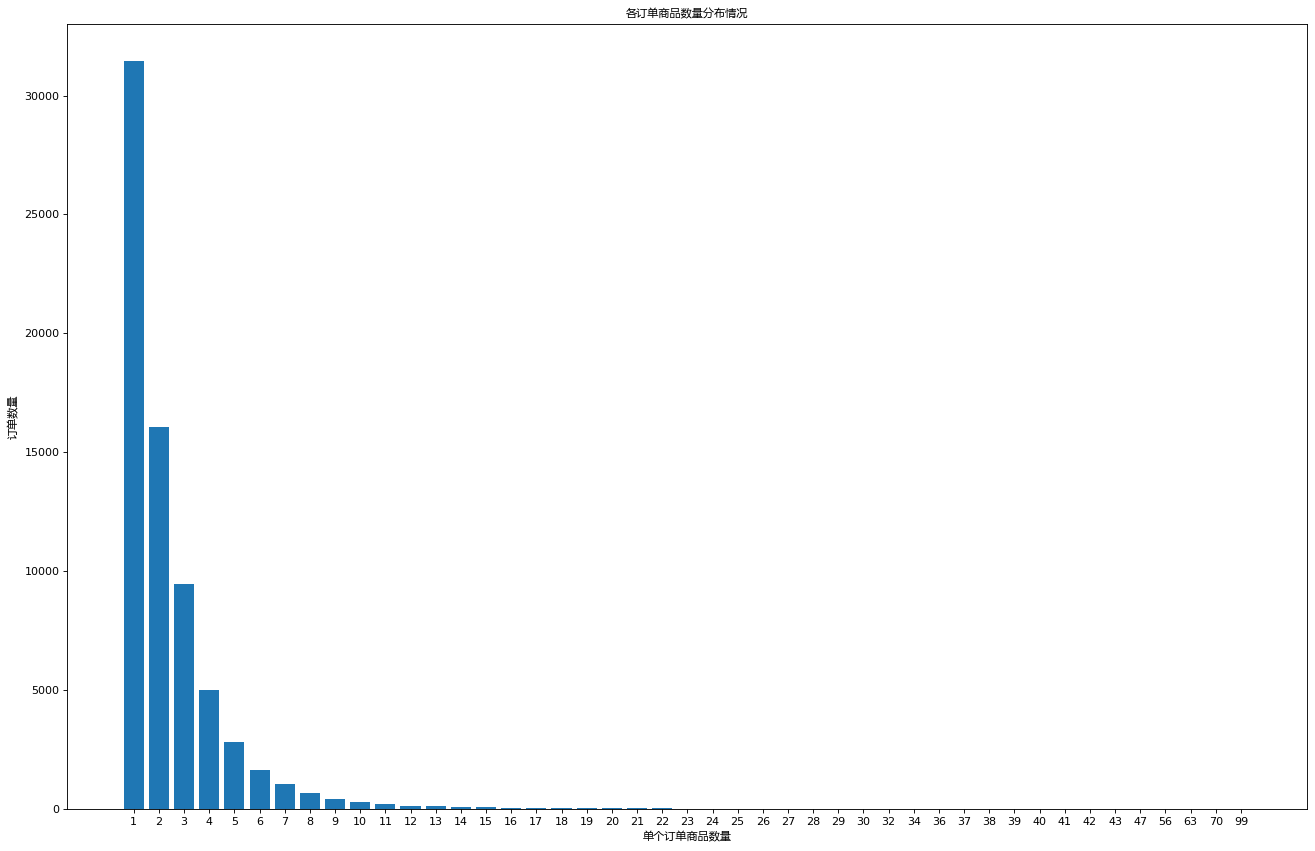

In [131]:
# 设置图形大小
plt.figure(figsize=(20,13),dpi =80)

# 设置坐标轴值
y = data1['user_id'].values
a = data1.index.values

# 设置x轴坐标刻度
x = range(len(a))
plt.xticks(x,a)

# 添加描述信息
plt.xlabel('单个订单商品数量',fontproperties = my_font)
plt.ylabel('订单数量',fontproperties = my_font)
plt.title('各订单商品数量分布情况',fontproperties = my_font)

# 绘制竖向条形图
plt.bar(x,y)

####  **<font color = blue> 结论：</font>**
  绝大部分订单的购买商品数量都不多，在0-5之间，其中购买数量为1的订单最多，呈激素下降漏斗模式。分析认为可能绝大多数消费者是个人消费者，且购买目标明确。

## 1.2 各订单 购买金额分析

In [101]:
df['price'].describe()

count    69659.000000
mean        35.893648
std         36.281942
min          0.000000
25%         14.490000
50%         25.980000
75%         43.700000
max       1286.010000
Name: price, dtype: float64

####  **<font color = blue> 结论：</font>**
1 每笔订单的平均购买金额为35.89，中位数25.98，众数11.77，说明大部门订单的购买金额集中在小额。
2 购买金额最小值为0，继续分析存在“免费”订单/被取消订单/退换货订单。

In [ ]:
# 分析金额值为0的订单

In [111]:
df[df['price']==0].quantity.describe()

count    80.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: quantity, dtype: float64

#### **<font color = blue> 结论：</font>**
购买金额最小值为0的订单数量均为1，说明存在“免费”订单/被取消订单/退换货订单。但该类订单总数为80，占总订单数0.1%，故无需将其删除

In [10]:
data2 = df.groupby('price').count()
data2.head()

,user_id,time,quantity
price,,,
0.00,80,80,80
1.63,1,1,1
1.98,1,1,1
2.49,3,3,3
2.66,2,2,2


In [11]:
data2.tail()

,user_id,time,quantity
price,,,
915.10,1,1,1
932.23,1,1,1
1028.51,1,1,1
1119.68,1,1,1
1286.01,1,1,1


In [52]:
a = data2.index.values
len(a)  # 数据量太大，不适合用条形图，应该用直方图表示

8209

In [48]:
# 将price转换为int类型（因直方图要求数据为int类型）

In [49]:
df['price']=df.price.astype(int)

(array([2.9028e+04, 2.1088e+04, 9.9970e+03, 4.2200e+03, 2.2670e+03,
        1.1500e+03, 6.6200e+02, 3.7300e+02, 2.5600e+02, 1.6000e+02,
        1.2400e+02, 6.5000e+01, 7.1000e+01, 4.6000e+01, 3.4000e+01,
        1.6000e+01, 1.4000e+01, 2.2000e+01, 1.6000e+01, 1.0000e+01,
        5.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00, 4.0000e+00,
        3.0000e+00, 0.0000e+00, 4.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.     ,   20.09375,   40.1875 ,   60.28125,   80.375  ,
         100.46875,  120.5625 ,  140.65625,  160.75   ,  1

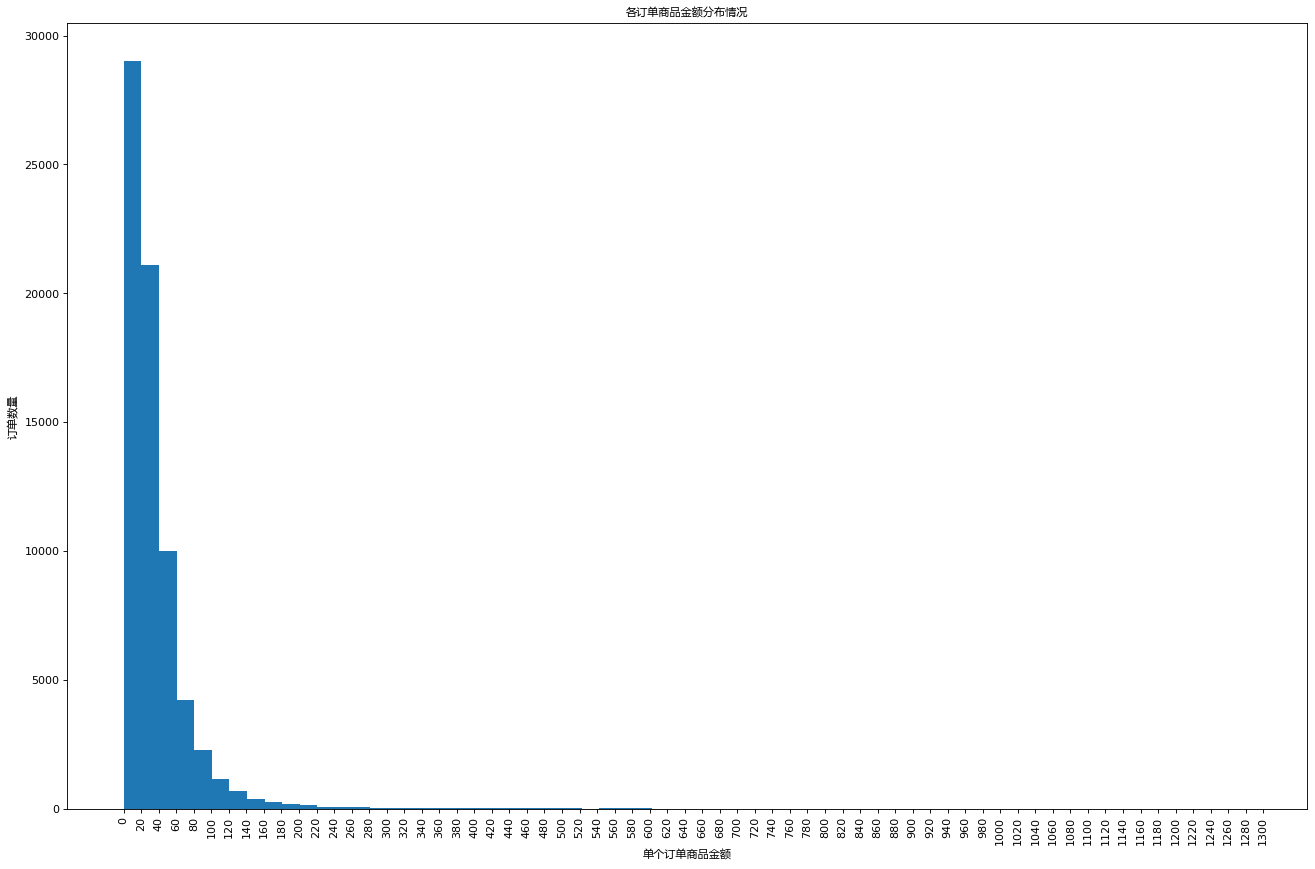

In [54]:
# 设置图形大小
plt.figure(figsize=(20,13),dpi = 80)

# 设置坐标轴值
y2 = df['price'].values

# 设置组距和组数
bins = (y2.max()-y2.min())//20   # (y2.max()-y2.min())=1286.xx

# 设置x轴坐标刻度
plt.xticks(range(min(y2),max(y2)+20,20),rotation =90)

# 添加描述信息
plt.xlabel('单个订单商品金额',fontproperties = my_font)
plt.ylabel('订单数量',fontproperties = my_font)
plt.title('各订单商品金额分布情况',fontproperties = my_font)

# 绘制竖向条形图
plt.hist(y2,bins)

In [ ]:
# 因数据集中在200以内，因此取前100个价格进行进一步的分析（此时可用条形图）

<BarContainer object of 83 artists>

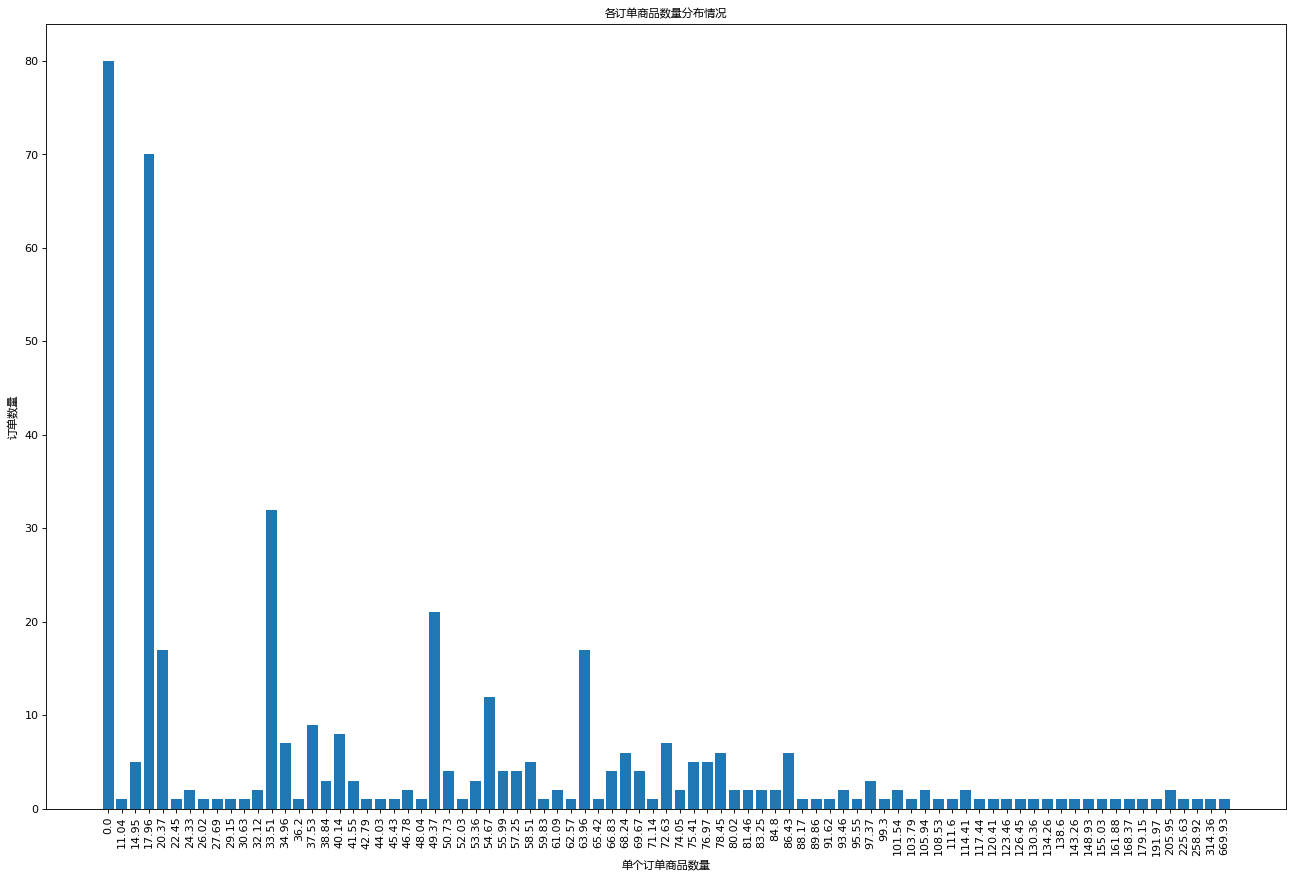

In [55]:
# 设置图形大小
plt.figure(figsize=(20,13),dpi =80)

# 设置坐标轴值
b2 = data2['user_id'].values
y2 = b2[::100]
a2 = data2.index.values
c2 = a2[::100]

# 设置x轴坐标刻度
x2 = range(len(c2))
plt.xticks(x2,c2,rotation = 90)

# 添加描述信息
plt.xlabel('单个订单商品数量',fontproperties = my_font)
plt.ylabel('订单数量',fontproperties = my_font)
plt.title('各订单商品数量分布情况',fontproperties = my_font)

# 绘制竖向条形图
plt.bar(x2,y2)

####  **<font color = blue> 结论：</font>**
1：绝大部分订单的消费金额在100以内；
2：具体而言，除0元订单外，单笔订单金额频率最高的是17.96，这也与前文分析的单个订单购买商品数量在0-5之间，最多为1个商品的结果相符。

#  **<font color = orange> 2. 商品销售动态分析</font>**

## 2.1 订单数量趋势分析

In [13]:
# 将时间设置为索引

In [14]:
df = df.set_index('time',drop = True)

Text(0.5, 1.0, '月总消费人数')

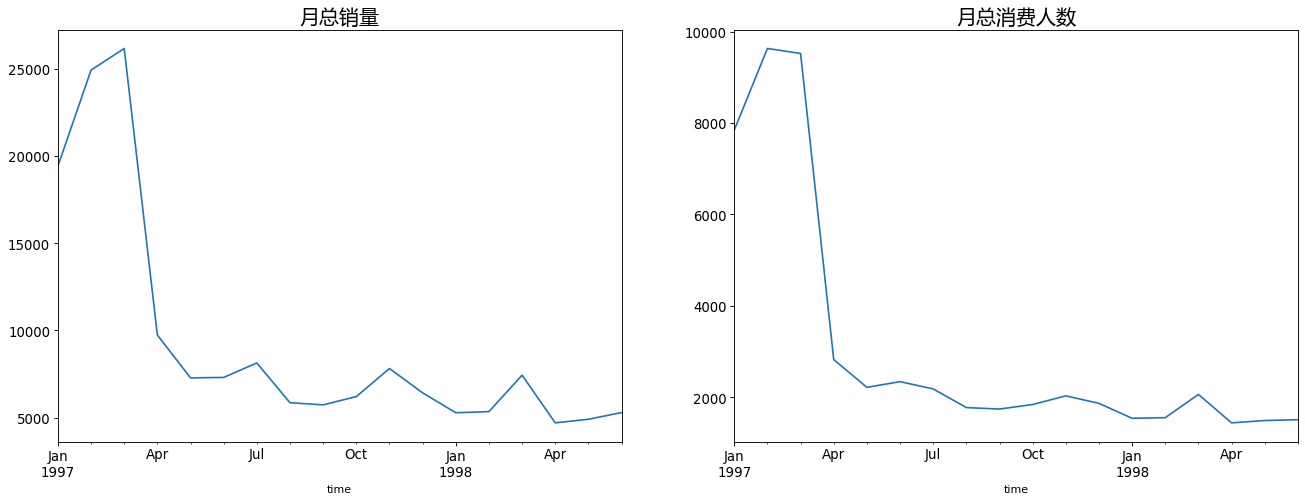

In [40]:
# 设置图的尺寸
plt.figure(figsize=(20,15),dpi = 80)

#每月的销量
ax3= plt.subplot(2,2,1)
data1 =df.resample('M').quantity.sum().plot(fontsize = 12)
plt.title('月总销量',fontproperties = my_font,fontsize = 18)

# 每月的消费人数
ax2 = plt.subplot(2,2,2)
data1 =df.resample('M').user_id.nunique().plot(fontsize = 12)
plt.title('月总消费人数',fontproperties = my_font,fontsize = 18)

## 2.2 订单金额趋势分析

Text(0.5, 1.0, '月总销售额')

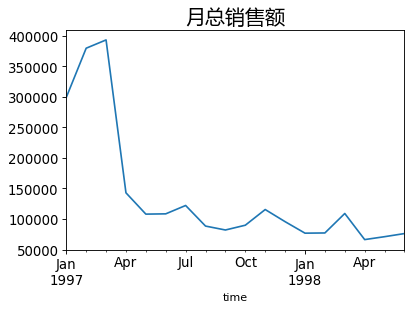

In [43]:
# 设置图的尺寸
plt.figure(figsize=(12,8),dpi = 80)

# 每月的总销售额
ax1 = plt.subplot(2,2,1)
data1 =df.resample('M').price.sum().plot(fontsize = 12)
plt.title('月总销售额',fontproperties = my_font,fontsize = 18)

####  **<font color = blue> 结论：</font>**
1:折线图的整体趋势基本一致，1997年前三个月的销量和消费人数特别高，其对应的销售额也是暴涨，在3月份之后骤然下降，之后趋于平稳；
2：分析原因，可能前几个月有异常值或者有促销营销活动；
3：1997年2-3月消费人数降低，但是销售额和销量仍在上升，分析认为用户中可能有需要重点发展的高价值客户；

## 2.3 异常值检测

In [ ]:
# 绘制订单商品金额的散点图来查看是否有异常值

Text(0, 0.5, '订单数量')

<Figure size 960x640 with 0 Axes>

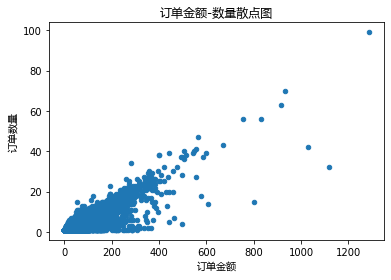

In [55]:
# 设置图的尺寸
plt.figure(figsize=(12,8),dpi = 80)

df.plot.scatter(y='quantity',x ='price')

plt.title('订单金额-数量散点图',fontproperties = my_font,fontsize = 12)
plt.xlabel('订单金额',fontproperties = my_font)
plt.ylabel('订单数量',fontproperties = my_font)

####  **<font color = blue> 结论：</font>**
 用户比较健康而且规律性很强。因为这是CD网站的销售数据，商品比较单一，金额和商品量的关系也因此呈线性，没几个离群点。

# <font color = orange> 3. 用户消费行为静态分析**</font>**

## 3.1 各用户 购买数量分析

### 3.1.1 各用户 积累购买数量分析

In [56]:
df.head()

,user_id,quantity,price
time,,,
1997-01-01,1,1,11.77
1997-01-12,2,1,12.00
1997-01-12,2,5,77.00
1997-01-02,3,2,20.76
1997-03-30,3,2,20.76


In [260]:
group_user = df.groupby('user_id').quantity.sum()
group_user.describe()

count    23570.000000
mean         7.122656
std         16.983531
min          1.000000
25%          1.000000
50%          3.000000
75%          7.000000
max       1033.000000
Name: quantity, dtype: float64

####  **<font color = blue> 结论1：</font>**
商品购买量平均值均等于其3/4分位数，说明少量的用户购买了大量的产品，直方图右偏。

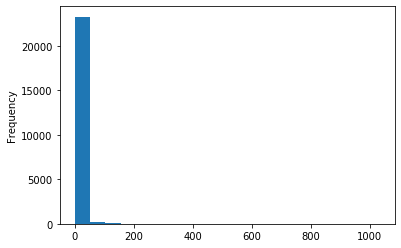

In [184]:
group_user.plot.hist(bins = 20)

####  **<font color = blue> 结论2：</font>**
从图上看出，订单数量呈集中趋势，可能是有个别的极大值干扰导致。
根据切比雪夫定理，距离平均值有三个标准差的值均为异常值，用户订单数量应该在7+17*3=58的范围内，因此排除异常值再分析

In [132]:
data4 =df.groupby('user_id').sum().query('quantity<58').quantity

(array([6.809e+03, 3.933e+03, 2.425e+03, 1.731e+03, 1.314e+03, 9.730e+02,
        7.610e+02, 6.550e+02, 5.100e+02, 4.320e+02, 3.540e+02, 3.760e+02,
        2.970e+02, 2.520e+02, 2.250e+02, 2.010e+02, 1.820e+02, 1.510e+02,
        1.360e+02, 1.560e+02, 1.000e+02, 1.170e+02, 9.900e+01, 9.600e+01,
        8.400e+01, 8.200e+01, 8.000e+01, 6.700e+01, 4.800e+01, 5.700e+01,
        4.600e+01, 4.800e+01, 3.600e+01, 3.100e+01, 5.100e+01, 3.200e+01,
        3.200e+01, 3.200e+01, 2.000e+01, 2.200e+01, 2.100e+01, 1.700e+01,
        1.900e+01, 1.800e+01, 1.400e+01, 2.500e+01, 1.500e+01, 1.300e+01,
        2.100e+01, 1.400e+01, 1.100e+01, 1.600e+01, 1.400e+01, 6.000e+00,
        1.500e+01, 1.900e+01]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
        53

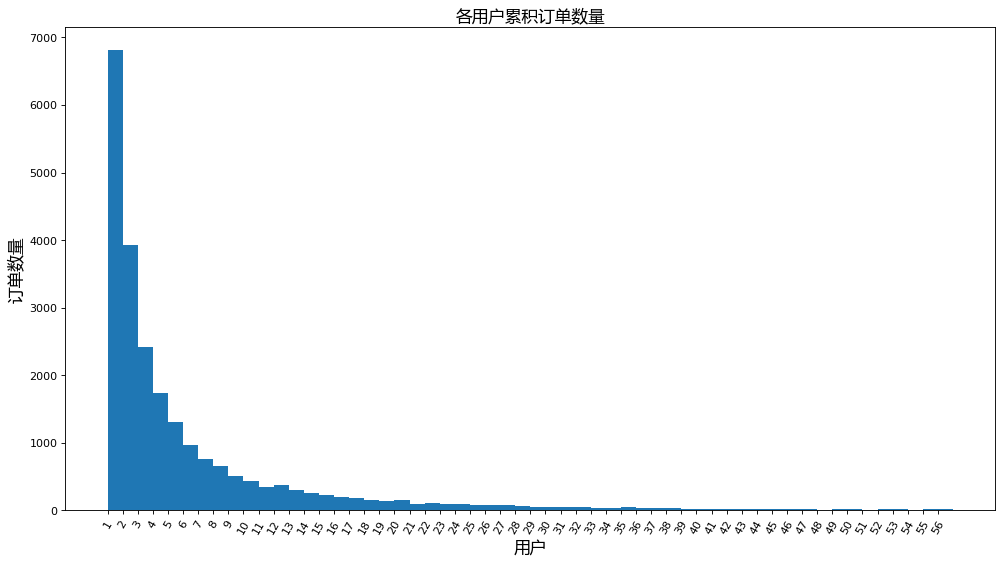

In [134]:
# 设置图像大小
plt.figure(figsize=(15,8),dpi = 80)

# 设置坐标轴
y3 = data4.values   

# 设置组距和组数
bins = (y3.max()-y3.min())  # (y3.max()-y3.min())=58

# 设置x轴刻度
plt.xticks(range(min(y3),max(y3)),rotation = 60,fontsize = 10)

# 添加描述信息
plt.xlabel('用户',fontproperties = my_font,fontsize = 15)
plt.ylabel('订单数量',fontproperties = my_font,fontsize = 15)
plt.title('各用户累积订单数量',fontproperties = my_font,fontsize = 15)

# 绘制竖向条形图
plt.hist(y3,bins)

####  **<font color = blue> 结论3：</font>**
消费能力强的用户有，但是数量不多，用户购买量大都在20以内

### 3.1.2 各用户 购买数量累积贡献分析  **<font color = red> 【重点】</font>**

In [264]:
group_user1 = df.groupby('user_id').sum()

In [265]:
cumsum_Q = group_user1.sort_values(by = 'quantity').apply(lambda x: x.cumsum()/x.sum())

In [266]:
cumsum_Q.head()

,quantity,price
user_id,,
1,0.000006,0.000005
8205,0.000012,0.000010
19059,0.000018,0.000015
19057,0.000024,0.000023
8209,0.000030,0.000031


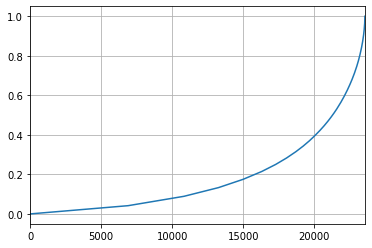

In [271]:
cumsum_Q.reset_index(drop=True).quantity.plot()
plt.grid()

####  **<font color = blue> 结论4：</font>**
按订单数量进行升序排列，前20000名用户贡献了约40%的订单，后面的近4000名用户贡献了60%的订单

**<font color = green> 注：</font>** 上行代码等同于以下代码

In [273]:
cumsum_Q =cumsum_Q.reset_index(drop=True)

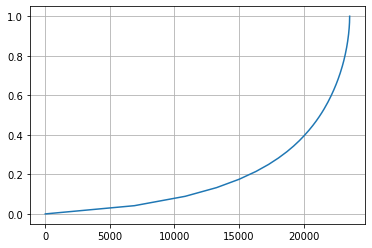

In [275]:
x = cumsum_Q.index.values
y = cumsum_Q.quantity.values
plt.plot(x,y)
plt.grid()

### 3.1.3 各用户 最大单笔购买数量分析

In [277]:
max_Q = df.groupby('user_id').quantity.max() 

In [279]:
max_Q.describe()

count    23570.000000
mean         2.854391
std          2.944292
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         99.000000
Name: quantity, dtype: float64

####  **<font color = blue> 结论5：</font>**
各用户平均最大单笔购买数量为3，为各用户平均购买数量的40%左右，可以推断各用户平均购买次数为2~3次。大多数用户最大购买量在1~2之间。

## 3.2 各用户 购买金额分析

### 3.2.1 各用户 累计购买金额分析

In [135]:
group_user = df.groupby('user_id').price.sum()
group_user.describe()

count    23570.000000
mean       106.080426
std        240.925195
min          0.000000
25%         19.970000
50%         43.395000
75%        106.475000
max      13990.930000
Name: price, dtype: float64

####  **<font color = blue> 结论1：</font>**
用户购买金额平均值均等于其3/4分位数，说明少量的用户购买了大量的产品，直方图右偏。

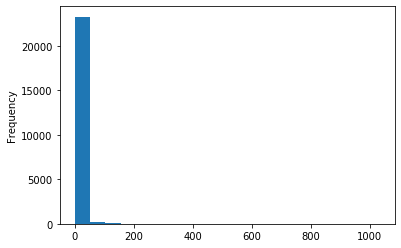

In [283]:
group_user.plot.hist(bins = 20)

####  **<font color = blue> 结论2：</font>**
从图上看出，订单金额呈集中趋势，可能是有个别的极大值干扰导致。
根据切比雪夫定理，距离平均值有三个标准差的值均为异常值，用户订单数量应该在106+241*3=829的范围内，因此排除异常值再分析

In [142]:
data5 =df.groupby('user_id').sum().query('price<829').price
data5 = data5.astype('int')

(array([5120., 4248., 2895., 2008., 1452., 1065.,  867.,  683.,  597.,
         462.,  441.,  379.,  277.,  262.,  240.,  197.,  185.,  167.,
         142.,  144.,  125.,  118.,  101.,   87.,  107.,   84.,   60.,
          65.,   76.,   51.,   40.,   44.,   41.,   30.,   34.,   25.,
          30.,   29.,   34.,   22.,   23.,   16.,   25.,   25.,   27.,
          16.,   11.,   15.,   12.,   14.,   15.,    9.,   17.,   11.,
           9.]), array([  0.        ,  15.03636364,  30.07272727,  45.10909091,
         60.14545455,  75.18181818,  90.21818182, 105.25454545,
        120.29090909, 135.32727273, 150.36363636, 165.4       ,
        180.43636364, 195.47272727, 210.50909091, 225.54545455,
        240.58181818, 255.61818182, 270.65454545, 285.69090909,
        300.72727273, 315.76363636, 330.8       , 345.83636364,
        360.87272727, 375.90909091, 390.94545455, 405.98181818,
        421.01818182, 436.05454545, 451.09090909, 466.12727273,
        481.16363636, 496.2       , 511.236363

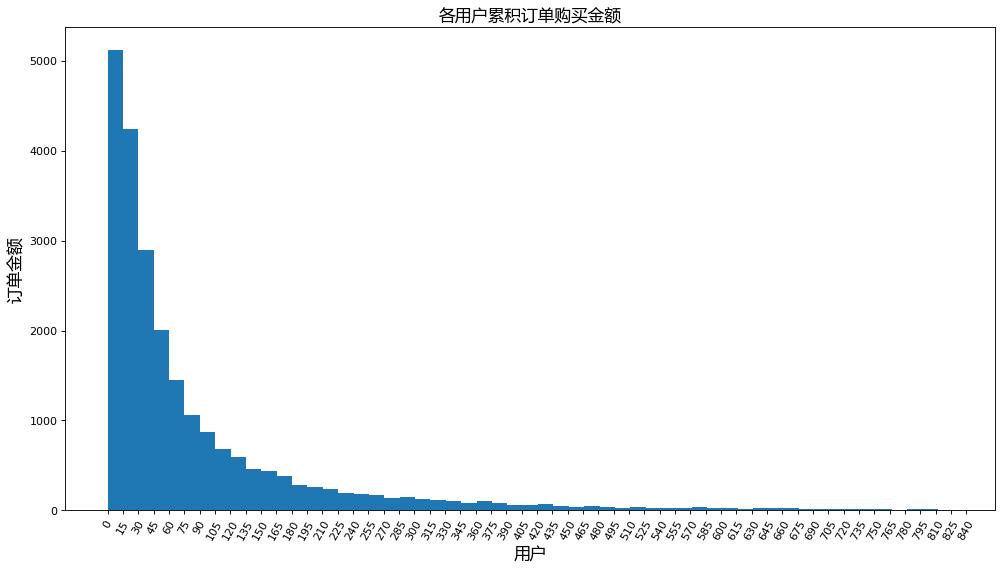

In [146]:
# 设置图像大小
plt.figure(figsize=(15,8),dpi = 80)

# 设置坐标轴
y4 = data5.values   

# 设置组距和组数
bins = (y4.max()-y4.min())//15  # (y3.max()-y3.min())=829

# 设置x轴刻度
plt.xticks(range(min(y4),max(y4)+15,15),rotation = 60,fontsize = 10)

# 添加描述信息
plt.xlabel('用户',fontproperties = my_font,fontsize = 15)
plt.ylabel('订单金额',fontproperties = my_font,fontsize = 15)
plt.title('各用户累积订单购买金额',fontproperties = my_font,fontsize = 15)

# 绘制竖向条形图
plt.hist(y4,bins)

####  **<font color = blue> 结论3：</font>**
大部分用户的消费能力确实不高，将近半数的用户消费金额不超过40元。高消费用户在图上几乎看不到。这也确实符合消费行为的行业规律。

### 3.2.2 各用户 购买金额累积贡献分析

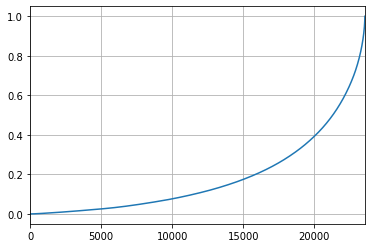

In [284]:
cumsum_P = group_user1.sort_values(by = 'price').apply(lambda x: x.cumsum()/x.sum())
cumsum_P.reset_index(drop = True).price.plot()
plt.grid()

#### **<font color = blue> 结论4：</font>**
按订单数量进行升序排列，前12500名(约50%)用户贡献了不到20%的订单，而消费金额排名前5000的用户贡献了60%的消费额度。

### 3.2.3 各用户最大单笔消费金额分析

In [287]:
max_P = df.groupby('user_id').price.max() 
max_P.describe()

count    23570.000000
mean        43.897931
std         46.153873
min          0.000000
25%         15.360000
50%         29.980000
75%         54.677500
max       1286.010000
Name: price, dtype: float64

#### **<font color = blue> 结论5：</font>**
各用户平均最大单笔消费金额为43.89，为各用户平均消费金额的41%左右，可以推断各用户平均购买次数为2~3次。

## 3.3 各用户 购买次数分析

In [294]:
data5 = df.groupby('user_id').count()
data5.head()

,time,quantity,price
user_id,,,
1,1,1,1
2,2,2,2
3,6,6,6
4,4,4,4
5,11,11,11


In [295]:
data5.time.describe()

count    23570.000000
mean         2.955409
std          4.736558
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        217.000000
Name: time, dtype: float64

#### **<font color = blue> 结论：</font>**
用户平均购买次数为3次，但中位数和众数为1，说明大多数用户仅消费一次，没有回购。

In [312]:
a = df.groupby('user_id').count().query('time<16').time.sort_values()

(array([11908.,  4079.,  2217.,  1441.,   995.,   635.,   475.,   392.,
          274.,   204.,   142.,   147.,   109.,   147.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15.]),
 <a list of 14 Patch objects>)

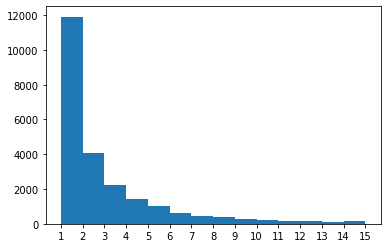

In [313]:
bins = max(a)-min(a)
plt.xticks(range(min(a),max(a)+1))
plt.hist(a,bins)

#### **<font color = blue> 结论：</font>**
根据切比雪夫定理，选取3+3*12 =15范围内的数据进行分析，大部分用户没有回购，购买次数大多在1-3范围内。

# <font color = orange>4. 用户消费行为动态分析**</font>** **<font color = red> 【重点】</font>**

## 4.1 各用户 第一次购买时间分析

Text(0.5, 1.0, '用户第一次消费时的人数趋势图')

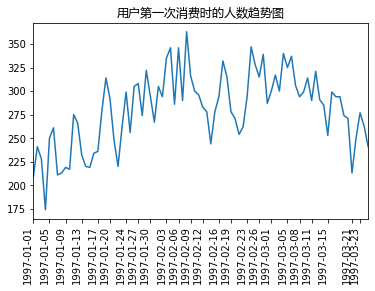

In [30]:
df.groupby('user_id').time.min().value_counts().plot()
x = df.groupby('user_id').time.min()
plt.xticks(list(x)[::1000],rotation = 90)
plt.title('用户第一次消费时的人数趋势图',fontproperties = my_font,fontsize = 12)

####  **<font color = blue> 结论1：</font>**
1: 从图中可以发现，用户的消费行为基本集中在前三月份，1997年4月份后也几乎无新用户产生；  
2: 新增用户在1997.2.11到1997.2.25间有巨大波动。

## 4.2 各用户 最后一次购买时间分析

Text(0.5, 1.0, '用户最后一次消费时的人数趋势图')

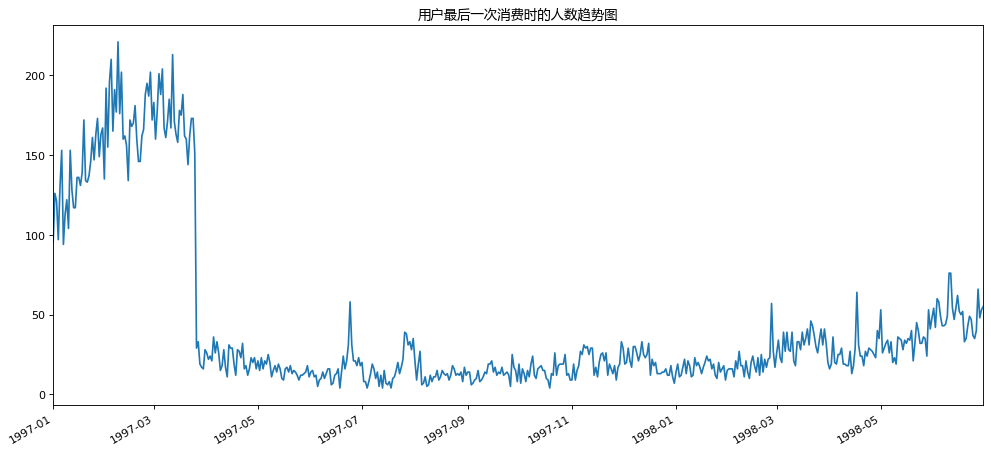

In [31]:
plt.figure(figsize=(15,7),dpi = 80)
df.groupby('user_id').time.max().value_counts().plot()
plt.title('用户最后一次消费时的人数趋势图',fontproperties = my_font,fontsize = 12)

####  **<font color = blue> 结论2：</font>**
最后一次购买基本集中在前三月，说明很多用户在前三月进行一次购买后不再回购。

## 4.3 各用户 最后（近）一次消费与当前时间间隔

## 4.4 各用户 生命周期分析

### 4.4.1 所有用户生命周期分析

In [31]:
max_time =df.groupby('user_id').time.max()
min_time =df.groupby('user_id').time.min()
life_time=max_time-min_time

In [32]:
life_time.describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: time, dtype: object

####  **<font color = blue> 结论4：</font>**
所有用户的平均生命周期是134天，但中位数和众数是0天，可推测大部分用户只消费了一次。

### 4.4.2 所有用户 生命周期分布

In [212]:
# 因为数据类型是timedelta时间，无法直接作出直方图，所以先换算成数值。换算的方式直接除timedelta函数即可，np.timedelta64(1, ‘D’)，D表示天，1表示1天，作为单位使用的。因为max-min已经表示为天了，两者相除就是周期

In [207]:
life_time = life_time/np.timedelta64(1,'D')

In [209]:
life_time= life_time.astype(int)

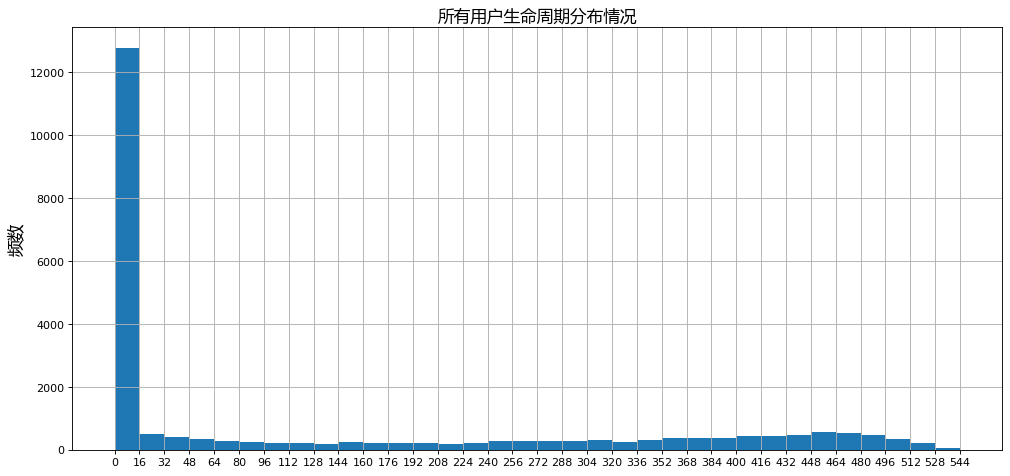

In [253]:
plt.figure(figsize=(15,7),dpi = 80)
bins = (life_time.max()-life_time.min())//16
plt.xticks(range(life_time.min(),life_time.max()+16,16))
plt.hist(life_time,bins)
plt.title('所有用户生命周期分布情况',fontproperties = my_font,fontsize = 15)
plt.ylabel('频数',fontproperties = my_font,fontsize =15)
plt.grid()

####  **<font color = blue> 结论5：</font>**
大部分用户只消费了一次，所有生命周期的大头都集中在了0天。
但这不是我们想要的答案，不妨将只消费了一次的新客排除，来计算所有消费过两次及两次以上的老客的生命周期。

### 4.4.3 老用户生命周期分布

In [216]:
life_time.head()

user_id
1      0
2      0
3    511
4    345
5    367
Name: time, dtype: int32

In [223]:
x = life_time.values

In [224]:
x1 =[i for i in x if i >0]

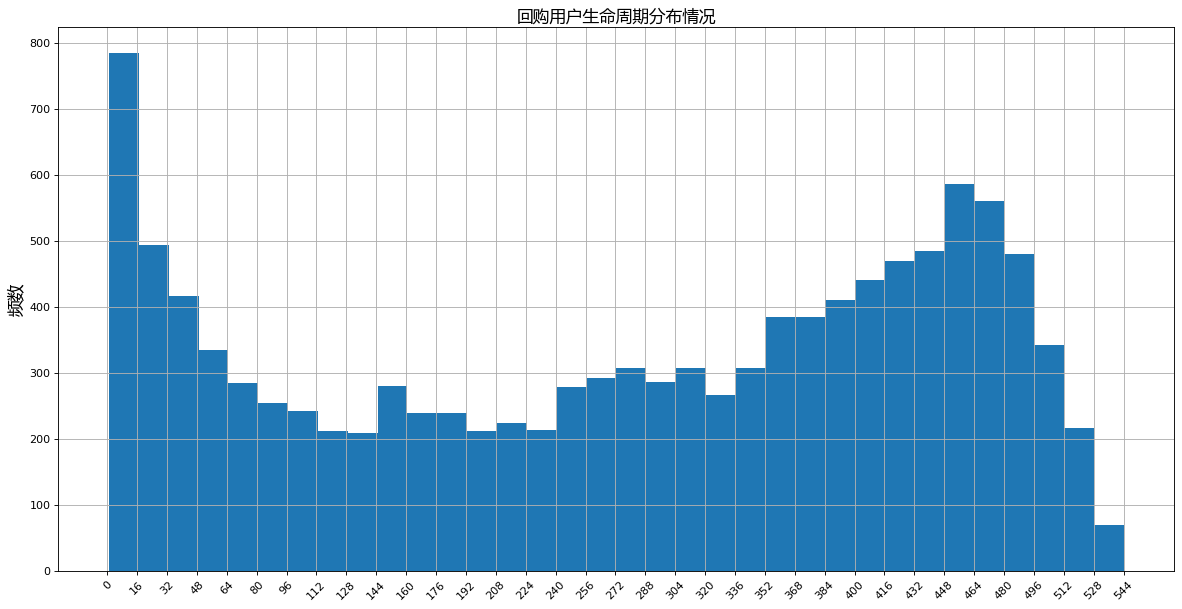

In [254]:
plt.figure(figsize=(18,9),dpi = 80)
bins = (life_time.max()-life_time.min())//16
plt.xticks(range(life_time.min(),life_time.max()+16,16),rotation=45)
plt.hist(x1,bins)
plt.title('回购用户生命周期分布情况',fontproperties = my_font,fontsize = 15)
plt.ylabel('频数',fontproperties = my_font,fontsize =15)
plt.grid()

####  **<font color = blue> 结论6：</font>**
1：上图可见，用户生命周期呈现双峰趋势，生命周期在16天内的用户是一个高峰，生命周期在450至500天间的用户是另一个高峰。  
2：根据此情况，应该在10天内对客户进行引导，促进其再次消费并形成消费习惯，延长其生命周期；在100至450天的用户，也要根据其特点推出有针对性的营销活动，引导其持续消费。

## 4.5 各用户 首次回购周期

#### **<font color = orange>  回购周期：</font>**   
前两次的消费间隔

In [255]:
df.head(10)

,user_id,time,quantity,price
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
5,3,1997-04-02,2,19.54
6,3,1997-11-15,5,57.45
7,3,1997-11-25,4,20.96
8,3,1998-05-28,1,16.99
9,4,1997-01-01,2,29.33


In [294]:
user_period = df.groupby('user_id').apply(lambda x:x.time-x.time.shift())
user_period.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: time, dtype: object

####  **<font color = blue> 结论7：</font>**
用户的平均购买周期是68天，但是其标准差较大，且中位数为31天远小于其平均数。购买周期最大值为533天，说明用户的购买周期波动较大。

对该数据做分布图

In [295]:
user_period.head(7)

user_id   
1        0        NaT
2        1        NaT
         2     0 days
3        3        NaT
         4    87 days
         5     3 days
         6   227 days
Name: time, dtype: timedelta64[ns]

In [298]:
user_period=(user_period/np.timedelta64(1,'D')).dropna()

In [299]:
user_period.head(10)

user_id    
2        2       0.0
3        4      87.0
         5       3.0
         6     227.0
         7      10.0
         8     184.0
4        10     17.0
         11    196.0
         12    132.0
5        14     13.0
Name: time, dtype: float64

In [300]:
user_period = user_period.astype(int)

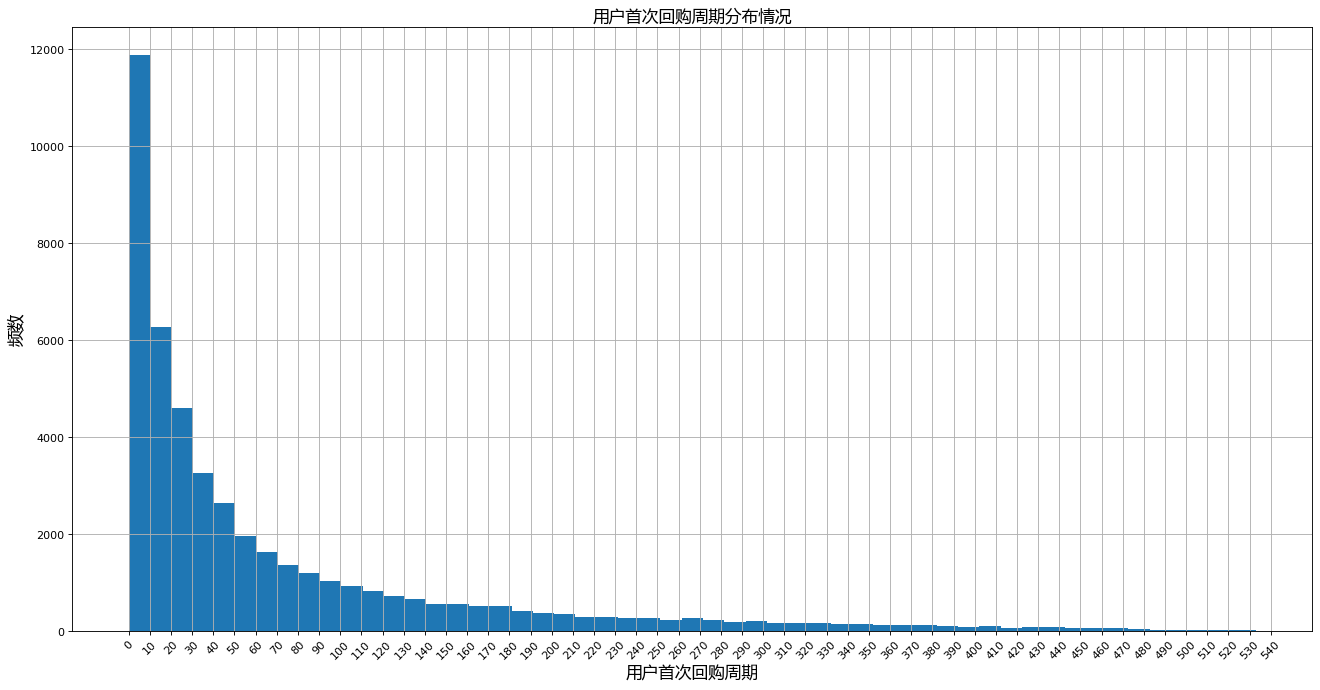

In [301]:
plt.figure(figsize=(20,10),dpi = 80)
bins = (user_period.max()-user_period.min())//10
plt.xticks(range(user_period.min(),user_period.max()+10,10),rotation=45)
plt.hist(user_period,bins)
plt.title('用户首次回购周期分布情况',fontproperties = my_font,fontsize = 15)
plt.ylabel('频数',fontproperties = my_font,fontsize =15)
plt.xlabel('用户首次回购周期',fontproperties = my_font,fontsize =15)
plt.grid()

####  **<font color = blue> 结论8：</font>**
典型的（指数）长尾分布，大部分用户的消费间隔确实比较短。不妨将时间召回点设为消费后立即赠送优惠券，消费后10天询问用户礼品怎么样，消费后20天提醒优惠券到期，消费后30天短信推送。

## 4.6 各用户 平均购买周期

In [302]:
user_period.describe()

count    46089.000000
mean        68.973768
std         91.033032
min          0.000000
25%         10.000000
50%         31.000000
75%         89.000000
max        533.000000
Name: time, dtype: float64

In [303]:
user_period.head()

user_id   
2        2      0
3        4     87
         5      3
         6    227
         7     10
Name: time, dtype: int32

####  **<font color = blue> 结论9：</font>**
用户的平均消费间隔时间是68天。

## 4.7 各用户 各月复购率

#### **<font color = orange>  复购率：</font>**   
在某时间窗口内消费两次及以上的用户在总消费用户中占比。这里的时间窗口是月，如果一个用户在同一天下了两笔订单，这里也将他算作复购用户

####  # 将数据进行透视

In [13]:
# 添加一个 月 列
df['month'] =df.time.astype('datetime64[M]')

In [14]:
df.head(10)

,user_id,time,quantity,price,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01
5,3,1997-04-02,2,19.54,1997-04-01
6,3,1997-11-15,5,57.45,1997-11-01
7,3,1997-11-25,4,20.96,1997-11-01
8,3,1998-05-28,1,16.99,1998-05-01
9,4,1997-01-01,2,29.33,1997-01-01


In [15]:
pivoted_counts=df.pivot_table(index = 'user_id',columns = 'month',
                                values='quantity',aggfunc = 'count').fillna(0) #某些用户在某月没有消费过，用nan表示，这里用0填充
columns_month = df.month.sort_values().astype('str').unique()
pivoted_counts.columns = columns_month
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


####  # 计算复购率：
转换：时间窗口设为一个月，消费2次及以上记为1，消费1次计0，没有消费记为NaN。

In [16]:
# applymap针对dataframe所有数据
pivoted_counts_transf = pivoted_counts.applymap(
    lambda x: 1 if x>1 else np.NaN if x ==0 else 0)
pivoted_counts_transf.head()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


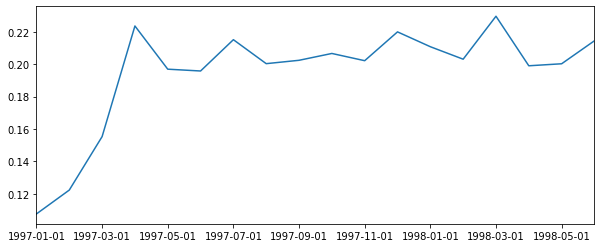

In [17]:
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize = (10,4))
# sum是求和（统计消费2次及以上的订单）  
# count是统计非NA值的数量（此处统计消费一次及以上的订单）

####  **<font color = blue> 结论10：</font>**
由于新用户的大量加入，早期新客的复购率并不高，但随着时间的推移，出现比较多忠诚的老顾客，复购率上升，维持在20%左右。

## 4.8 各用户 各月回购率

#### **<font color = orange>  回购率：</font>**   
是某一个时间窗口内消费的用户，在下一个时间窗口仍旧消费的占比。比如，我1月消费用户1000，他们中有300个2月依然消费，回购率是30%。

#### # 每个用户每个月平均消费金额，进行数据透视

In [19]:
pivoted_price = df.pivot_table(index = 'user_id',columns = 'month',
                               values='price',aggfunc = 'mean').fillna(0)
columns_month = df.month.astype('str').unique()
pivoted_price.columns = columns_month
pivoted_price.head()

,1997-01-01,1997-03-01,1997-04-01,1997-11-01,1998-05-01,1997-08-01,1997-12-01,1997-02-01,1997-05-01,1997-06-01,1997-07-01,1997-09-01,1998-01-01,1997-10-01,1998-03-01,1998-06-01,1998-02-01,1998-04-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [20]:
# 本月内有消费记录记为1，没有则为0
pivoted_purchase = pivoted_price.applymap(lambda x: 1 if x>0 else 0)
pivoted_purchase.head()

,1997-01-01,1997-03-01,1997-04-01,1997-11-01,1998-05-01,1997-08-01,1997-12-01,1997-02-01,1997-05-01,1997-06-01,1997-07-01,1997-09-01,1998-01-01,1997-10-01,1998-03-01,1998-06-01,1998-02-01,1998-04-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [24]:
# 如果用户本月有消费，且下月有消费，记为1，下月无消费，记为0；如果用户本月没有消费，记为NaN。

# 先定义一个函数
def purchase_return(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status

from pandas import DataFrame
# 用apply函数且axis=1，应用在所有行上。
pivoted_purchase_return = pivoted_purchase.apply(purchase_return,axis = 1)
#此时输出为Series，需要将其转化为DataFrame类型，相应设置index和columns
columns_month = df.month.sort_values().astype('str').unique()
user_id = pivoted_purchase.index
pivoted_purchase_return1 = pd.DataFrame(list(pivoted_purchase_return),
                                        columns = columns_month,index = user_id)
# Series转化为Dataframe的方法：先转化为list类型，再转化为DataFrame，期间可传入columns
pivoted_purchase_return1.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


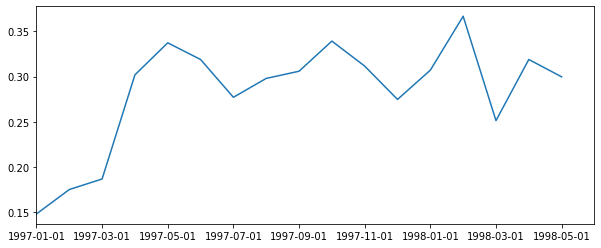

In [25]:
pivoted_purchase_return1.mean().plot(figsize = (10,4))

####  **<font color = blue> 结论11：</font>**
1. 用户的回购率约为30%，大于复购率20%。  
2. 综合回购率和复购率可知，新客质量整体低于老客，老客忠诚度表现较好，这是CDNow网站的用户消费特征。

## 4.9 各用户 各月留存率 (3,7,15,30,90,365天为周期)

#### **<font color = orange>  留存率：</font>**   
指用户第一次消费后，有多少比率进行第二次消费。

In [28]:
user_purchase = df[['user_id','quantity','price','time']]
user_purchase.head()

,user_id,quantity,price,time
0,1,1,11.77,1997-01-01
1,2,1,12.00,1997-01-12
2,2,5,77.00,1997-01-12
3,3,2,20.76,1997-01-02
4,3,2,20.76,1997-03-30


In [33]:
user_purchase_retention = pd.merge(left = user_purchase,right = min_time.reset_index(),
                                  how ='inner',on='user_id')
user_purchase_retention.head()

,user_id,quantity,price,time_x,time_y
0,1,1,11.77,1997-01-01,1997-01-01
1,2,1,12.00,1997-01-12,1997-01-12
2,2,5,77.00,1997-01-12,1997-01-12
3,3,2,20.76,1997-01-02,1997-01-02
4,3,2,20.76,1997-03-30,1997-01-02


In [35]:
user_purchase_retention['time_diff']=user_purchase_retention.time_x-user_purchase_retention.time_y
# 将天数转化为数值
user_purchase_retention['time_diff_values'] = user_purchase_retention.time_diff.apply(
lambda x:x/np.timedelta64(1,"D"))
user_purchase_retention.head()

,user_id,quantity,price,time_x,time_y,time_diff,time_diff_values
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0


利用cut函数将数据进行分箱。这里time_diff_values=0并没有被划分入0～3天，因为计算的是留存率，如果用户仅消费了一次，留存率应该是0。另外用户一天内多次消费，但以后没有消费，也算作留存率0.

将时间差值分箱处理：
分成0～3天内，3～7天内，7～15天……代表用户当前消费时间距第一次消费属于哪个时间段

In [39]:
bins = [0,3,7,15,30,60,90,180,365]
user_purchase_retention['time_bin']=pd.cut(user_purchase_retention.time_diff_values,bins)
user_purchase_retention.head(10)

,user_id,quantity,price,time_x,time_y,time_diff,time_diff_values,time_bin
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0,NaN
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0,NaN
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0,NaN
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0,NaN
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0,"(60.0, 90.0]"
5,3,2,19.54,1997-04-02,1997-01-02,90 days,90.0,"(60.0, 90.0]"
6,3,5,57.45,1997-11-15,1997-01-02,317 days,317.0,"(180.0, 365.0]"
7,3,4,20.96,1997-11-25,1997-01-02,327 days,327.0,"(180.0, 365.0]"
8,3,1,16.99,1998-05-28,1997-01-02,511 days,511.0,NaN
9,4,2,29.33,1997-01-01,1997-01-01,0 days,0.0,NaN


#### # 进行数据透视,获得的结果是用户在第一次消费之后，在后续各时间段内的消费总额

In [46]:
pivoted_retention = user_purchase_retention.pivot_table(index = 'user_id',columns = 'time_bin',
                                       values = 'price',aggfunc = sum,dropna =False) 
# Pandas函数pivot_table会默认删除含有空值的行，用dropna=False保持NaN的值。
pivoted_retention.head()

time_bin  (0, 3]  (3, 7]  (7, 15]  (15, 30]  (30, 60]  (60, 90]  (90, 180]  \
user_id                                                                      
1            NaN     NaN      NaN       NaN       NaN       NaN        NaN   
2            NaN     NaN      NaN       NaN       NaN       NaN        NaN   
3            NaN     NaN      NaN       NaN       NaN      40.3        NaN   
4            NaN     NaN      NaN     29.73       NaN       NaN        NaN   
5            NaN     NaN    13.97       NaN      38.9       NaN      110.4   

time_bin  (180, 365]  
user_id               
1                NaN  
2                NaN  
3              78.41  
4              41.44  
5             155.54  

In [48]:
pivoted_retention.mean() #各时间段的平均消费额

time_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

####  **<font color = blue> 结论12：</font>**
计算了第一次消费过后，后续个时间段的消费平均值，虽然后面的时间段消费金额更高，但是其时间段更广，因此第一次消费后的0-3天内有可能消费更高。
但仍然要看具体的数字，看有多少用户比例在初次购买后0-3天内再次消费：

In [50]:
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x: 1 if x>0 else 0)
pivoted_retention_trans.head()

time_bin  (0, 3]  (3, 7]  (7, 15]  (15, 30]  (30, 60]  (60, 90]  (90, 180]  \
user_id                                                                      
1              0       0        0         0         0         0          0   
2              0       0        0         0         0         0          0   
3              0       0        0         0         0         1          0   
4              0       0        0         1         0         0          0   
5              0       0        1         0         1         0          1   

time_bin  (180, 365]  
user_id               
1                  0  
2                  0  
3                  1  
4                  1  
5                  1  

Text(0.5, 1.0, '留存率')

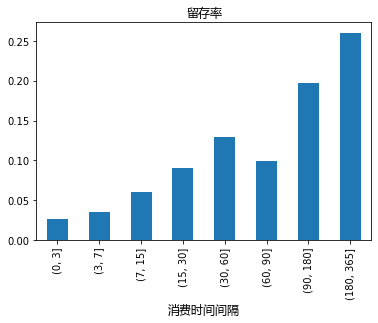

In [55]:
pivoted_retention_trans.mean().plot.bar()
plt.xlabel('消费时间间隔',fontproperties = my_font,fontsize = 12)
plt.title('留存率',fontproperties = my_font,fontsize = 12)

####  **<font color = blue> 结论13：</font>**
可见0-3天内再次消费的比例只有只有2.5%，3-7天之内的消费比例只有3%。说明CD购买并不是高频消费行为。时间范围放宽之后，数字好看了不少，有20%的用户在3个月到半年内再次购买，25%的用户在半年到一年内再次购买。  
因此，从运营角度讲，既要培养新用户，又要注重培养用户忠诚度，放长线钓大鱼。

## 4.10 用户分层（活跃用户和回流用户比率）

### 4.10.1 按用户价值分层---RFM模型

为了进行精细化运营，可以利用RMF模型对用户价值指数（衡量历史到当前用户贡献的收益）进行计算，其中  
最近一次消费-R（Rencency）：客户最近一次交易时间的间隔。R值越大，表示客户交易发生的日期越久，反之则交易发生的日期越近。  
消费频率-F（Frequency）：客户在最近一段时间内交易的次数。F值越大，表示客户交易越频繁，反之则表示客户交易不够活跃。  
消费金额-M（Monetary）：客户在最近一段时间内交易的金额。M值越大，表示客户价值越高，反之则表示客户价值越低。  
根据上述三个维度，对客户做细分(一段时间指所有数据时间段，即这18个月内)

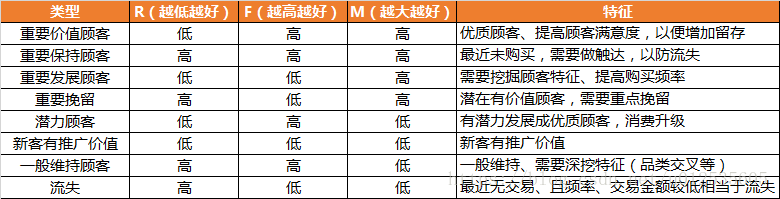

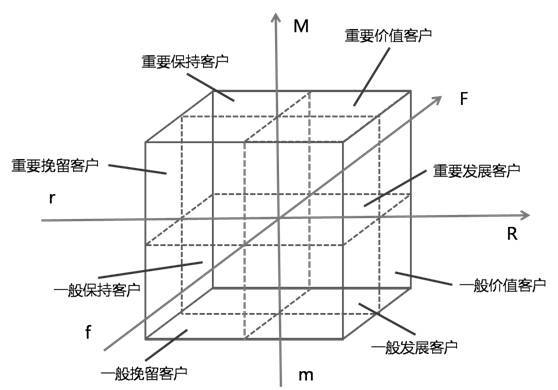

In [57]:
rfm = df.pivot_table(index = 'user_id',values = ['price','time','quantity'],
                    aggfunc = {'price':'sum','time':'max','quantity':'sum'})
rfm.head()

,price,quantity,time
user_id,,,
1,11.77,1,1997-01-01
2,89.00,6,1997-01-12
3,156.46,16,1998-05-28
4,100.50,7,1997-12-12
5,385.61,29,1998-01-03


In [59]:
# 日期的最大值与当前日期的差值为R
rfm['R']=(rfm['time'].max()-rfm['time'])/np.timedelta64(1,'D')
rfm.rename(columns = {'price':'M','quantity':'F'},inplace=True)
rfm.head()

,M,F,time,R
user_id,,,,
1,11.77,1,1997-01-01,545.0
2,89.00,6,1997-01-12,534.0
3,156.46,16,1998-05-28,33.0
4,100.50,7,1997-12-12,200.0
5,385.61,29,1998-01-03,178.0


In [61]:
# 构建rfm模型公式
def get_rfm(x):
    level = x.apply(lambda x:'1' if x>=0 else '0')
    label = level['R'] + level['F'] + level['M']
    d = {'111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'}
    result = d[label]
    return result

rfm['label'] = rfm[['R','F','M']].apply(lambda x:(x-x.mean()) / x.std()).apply(get_rfm,axis=1)
rfm.head()
#求和
rfm.groupby('label').sum()

,M,F,R
label,,,
一般价值客户,7181.28,650,36295.0
一般保持客户,19937.45,1712,29448.0
一般发展客户,196971.23,13977,591108.0
一般挽留客户,438291.81,29346,6951815.0
重要价值客户,167080.83,11121,358363.0
重要保持客户,1592039.62,107789,517267.0
重要发展客户,45785.01,2023,56636.0
重要挽留客户,33028.40,1263,114482.0


####  **<font color = blue> 结论14：</font>**
M列中不同层次客户的消费累计金额，重要保持客户的累计消费金额为159203.62，排名最高

In [63]:
rfm.groupby('label').size()

label
一般价值客户       77
一般保持客户      206
一般发展客户     3300
一般挽留客户    14074
重要价值客户      787
重要保持客户     4554
重要发展客户      331
重要挽留客户      241
dtype: int64

####  **<font color = blue> 结论15：</font>**
以上为不同层次用户的消费人数，一般挽留用户的消费人数排名第一，有14074人，重要保持客户排名第二，有4554人，与一般挽留用户差距比较大，但累计消费金额最多，业务方可以根据结果对客户分类运营，降低营销成本，提高ROI。

### 4.10.2 按用户活跃程度分层---新用户、活跃用户、不活跃用户、回流用户

新用户的定义是第一次消费。  
活跃用户即老客，在某一个时间窗口内有过消费。  
不活跃用户则是时间窗口内没有消费过的老客。  
回流用户是在上一个窗口中没有消费，而在当前时间窗口内有过消费。  
例如，某一个用户，在1月份首次消费即是新用户；他在2月份又消费，则是活跃用户；3月份不消费，属于不活跃用户；4月份消费，此时是回流用户，5月份又消费，属于活跃用户。

if逻辑判断部分比较复杂，主要分为两部分：如果本月没有消费，还要额外判断他是不是新客，如果一直不是新客，则延续之前的状态，设置为unreg。
如果本月有消费，则需判断是不是第一次消费以及上一个时间窗口的消费状态。

In [65]:
def active_ststus(data):
    status = []
    for i in range(18):
        #若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        #若本月有消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status
pivoted_purchase_status = pivoted_purchase.apply(lambda x: active_ststus(x), axis = 1)
#此时输出为Series，需要将其转化为DataFrame类型，相应设置index和columns
columns_month = df.month.sort_values().astype('str').unique()
user_id = pivoted_purchase.index
pivoted_purchase_status1 = pd.DataFrame(list(pivoted_purchase_status),columns = columns_month, index = user_id)
pivoted_purchase_status1.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


用户每个月的分层状态以及变化已经被计算出来。

In [66]:
purchase_status1_counts = pivoted_purchase_status1.replace('unreg', np.NaN).apply(pd.value_counts) #此时apply是在列上执行运算
#把unreg状态排除掉，他是未来作为新客，只是一个暂时状态。然后计算不同分层每月的统计量
purchase_status1_counts

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1155.0,1680,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624,632.0,512.0,472.0,569.0,517.0,458.0,446.0
new,7814.0,8455.0,7231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1402,1232.0,1025.0,1079.0,1489.0,919.0,1030.0,1060.0
unactive,NaN,6659.0,13994,20678.0,21286.0,21161.0,21320.0,21728.0,21761.0,21661.0,21474,21638.0,21965.0,21951.0,21444.0,22066.0,22014.0,21996.0


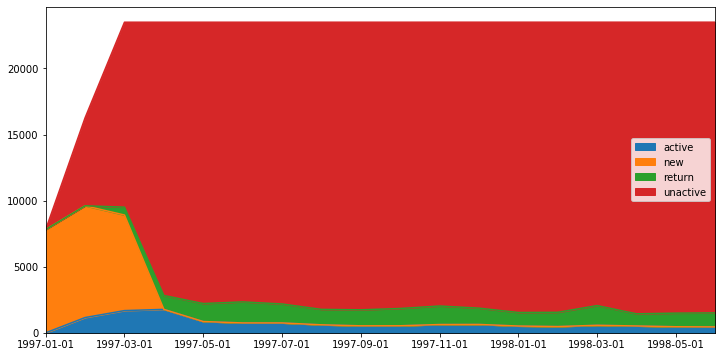

In [67]:
purchase_status1_counts.fillna(0).T.plot.area(figsize = (12,6))

只看蓝色和绿色活跃用户和回流用户两个分层，他们的和就是消费用户占比。3月份之后，总量不再变化，说明后期没有新客。

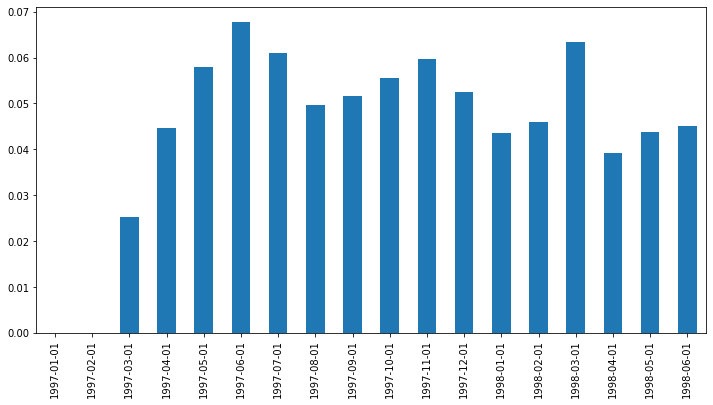

In [68]:
return_rate = purchase_status1_counts.apply(lambda x: x/x.sum())
return_rate.loc['return'].plot.bar(figsize = (12,6)) #每个月回流用户的占比

回流用户占比为5%-8%之间，有下降趋势，回流用户占比，指在总用户中的占比。

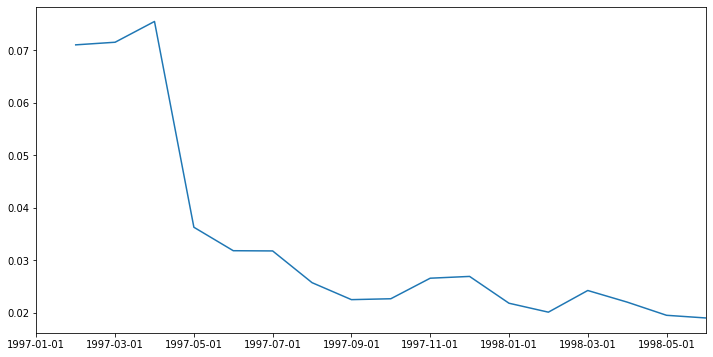

In [69]:
return_rate.loc['active'].plot(figsize = (12,6)) #每月活跃用户的占比

####  **<font color = blue> 结论16：</font>**
活跃用户下降趋势更明显，后期占比为2%左右。活跃用户为连续消费用户，质量在一定程度上高于回流用户。  
结合回流用户和活跃用户，后期消费中60%是回流用户，40%是活跃用户，整体质量尚可，对于这两个分层依旧有改进空间，可以继续细化数据。